## Redes Neurais

Nesse material será trabalhado o conceito das redes neurais utilizando a implementação disponível no Scikit.

In [1]:
import numpy  as np
import pandas as pd

# carrega os dados
df = pd.read_csv('heart.csv')

# separa os atributos categoricos
features = ['cp','restecg','ca','thal']
df_d = pd.get_dummies(data=df, columns=features)

# separa X e y

X = df_d.drop(columns=['target'])
y = df_d.target

In [2]:
y.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [3]:
# validação hold out

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [4]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(15), random_state=42)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
# acurácia no treinamento
model.score(X_train,y_train)

0.5467980295566502

In [6]:
# acurácia no teste
model.score(X_test,y_test)

0.54

In [7]:
# validação cruzada

from sklearn.model_selection import cross_val_score
scores = cross_val_score(MLPClassifier(hidden_layer_sizes=(15), max_iter=1000, random_state=42), X, y, cv=10)
print(scores.mean(), scores.std() * 2)

0.5445383759733037 0.014886135167101147


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

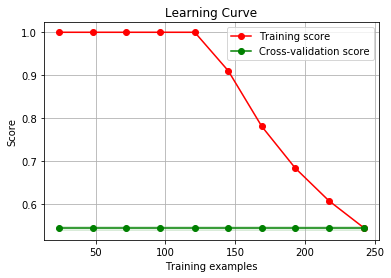

In [9]:
# observando a mudança de uma rede em consequência do número de amostras

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

estimator = MLPClassifier(hidden_layer_sizes=(15), max_iter=1000, random_state=42)
plot_learning_curve(estimator, 'Learning Curve', X, y, cv=5, n_jobs=4)

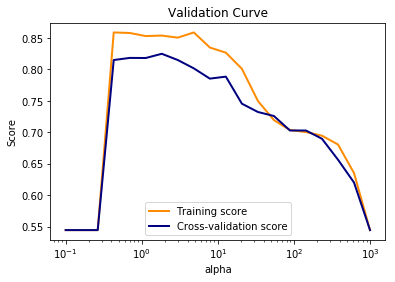

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [10]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv=None, n_jobs=None):
    plt.figure()
    
    plt.xlabel(param_name)
    plt.ylabel("Score")
    train_scores, test_scores = validation_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, 
                                                 param_name=param_name, param_range=param_range)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.ylabel("Score")
    
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
    return plt

estimator = MLPClassifier(hidden_layer_sizes=(15), max_iter=1000, random_state=42)
param_range = np.logspace(-1, 3, 20)
plot_validation_curve(estimator, 'Validation Curve', X, y, "alpha", param_range, cv=5, n_jobs=4)

Outros parâmetros podem ser explorados, entre os principais considere *activation* e *solver*, além de *hidden_layer_size*. Ao alterar o solver, também verifique quais parâmetros são pertinentes a eles. A documentação está disponível em:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html



### Exercícios *(não é para entregar)*

1. Faça a curva de validação variando o valor de k no algoritmo dos vizinhos próximos. Existe momentos de subajustamento ou de sobreajustamento?
2. Faça a curva de validação variando o número de estimadores para o algoritmo das florestas aleatórias (RandomForest). O que pode ser observado com relação às curvas? O número de estimadores afeta diretamente o estado de subajustamento ou de sobreajustamento?
3. Avalie algumas variações de arquitetura das redes neurais e compare com os modelos dos vizinhos próximos e das florestas aleatórias no seguinte aspecto: todos eles precisam da mesma quantidade de amostras para estabilizar e ter o mesmo resultado ou algum deles aprende com menos amostras?